In [1]:
import numpy as np

In [2]:
# np.pi : 원주율
# np.linspace(시작점, 끝점, 값의 개수) : 시작점~끝점까지 값의 개수만큼 일정한 간격을 가지고 나오게 하는 함수
s = np.sin(2*np.pi*0.125*np.linspace(0,20,100))

In [3]:
X, y =[],[]

# list comprehension => [O for V in O]
for i in range(3,100):
    X.append(np.array([s[i-j] for j in range(3,0,-1)]))
    y.append(s[i])

[array([0.        , 0.1580014 , 0.31203345]),
 array([0.1580014 , 0.31203345, 0.45822652]),
 array([0.31203345, 0.45822652, 0.59290793]),
 array([0.45822652, 0.59290793, 0.71269417]),
 array([0.59290793, 0.71269417, 0.81457595]),
 array([0.71269417, 0.81457595, 0.89599377]),
 array([0.81457595, 0.89599377, 0.95490224]),
 array([0.89599377, 0.95490224, 0.98982144]),
 array([0.95490224, 0.98982144, 0.99987413]),
 array([0.98982144, 0.99987413, 0.98480775]),
 array([0.99987413, 0.98480775, 0.94500082]),
 array([0.98480775, 0.94500082, 0.88145336]),
 array([0.94500082, 0.88145336, 0.79576184]),
 array([0.88145336, 0.79576184, 0.69007901]),
 array([0.79576184, 0.69007901, 0.56705986]),
 array([0.69007901, 0.56705986, 0.42979491]),
 array([0.56705986, 0.42979491, 0.28173256]),
 array([0.42979491, 0.28173256, 0.12659245]),
 array([ 0.28173256,  0.12659245, -0.03172793]),
 array([ 0.12659245, -0.03172793, -0.18925124]),
 array([-0.03172793, -0.18925124, -0.34202014]),
 array([-0.18925124, -0.3

In [4]:
X = np.array(X).reshape(len(X),3,1)
y = np.array(y).reshape(len(y),1)

In [5]:
import matplotlib.pyplot as plt

In [7]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

In [9]:
model = Sequential()
model.add(SimpleRNN(units=10, input_shape =(3,1)))
model.add(Dense(units=1, activation='tanh'))

In [10]:
# 분류하는 것이 아니기 때문에 mean_squared_error를 씀
# 분류하는 것이 아니기 때문에 accuracy가 필요없음
model.compile(loss='mean_squared_error', optimizer='sgd')

In [11]:
hist = model.fit(X,y, epochs=10, batch_size=10, verbose=2)

Epoch 1/10
10/10 - 31s - loss: 0.2923
Epoch 2/10
10/10 - 0s - loss: 0.1355
Epoch 3/10
10/10 - 0s - loss: 0.1116
Epoch 4/10
10/10 - 0s - loss: 0.1026
Epoch 5/10
10/10 - 0s - loss: 0.0973
Epoch 6/10
10/10 - 0s - loss: 0.0940
Epoch 7/10
10/10 - 0s - loss: 0.0913
Epoch 8/10
10/10 - 0s - loss: 0.0891
Epoch 9/10
10/10 - 0s - loss: 0.0867
Epoch 10/10
10/10 - 0s - loss: 0.0844


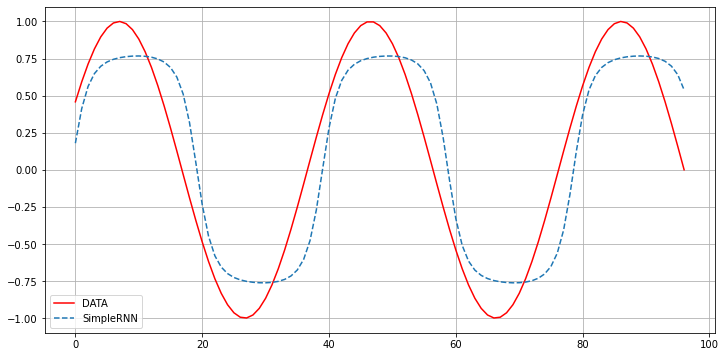

In [14]:
plt.figure(figsize=(12,6))
plt.plot(s[3:], c='red', label='DATA')
plt.plot(model.predict(X), linestyle='--', label='SimpleRNN')
plt.legend()
plt.grid()
plt.show()